# TP2 Régression

On souhaite faire de la modélisation sur des problématiques de régression. Comment construire un bon modèle et surtout un modèle optimale par rapport au jeu de données et à la famille de modèle utilisés.

## 1. Modèles polynomiaux

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

In [2]:
# Fonction de génération

def genere_exemple_dim1(xmin, xmax, NbFx, sigma):
    x = np.arange(xmin, xmax, (xmax-xmin)/NbFx)
    y = np.sin(-np.pi + 2*x*np.pi)+np.random.normal(loc=0, scale=sigma, size=x.size)
    return x.reshape(-1,1), y

In [3]:
# Fonction EQM
def getMSE(x, y, reg):
    return sum(pow(reg.predict(x)-y,2))/x.shape[0]

In [4]:
# Fonctions plot

def plot_model(Xa, Ya, Xt, Yt, reg, degre, nameFig):
    Ypred = reg.predict(Xt)
    plt.plot(Xa[:,1], Ya, '*r')
    plt.plot(Xt[:,1], Yt, '-b')
    plt.plot(Xt[:,1], Ypred, '-r')
    plt.grid()
    plt.savefig(nameFig+'.jpg', dpi=200)
    plt.legend(["Sortie bruitée", "Sortie réelle", "Modèle prédit"])
    plt.title("Prédiction du modèle à degré %02d" % (degre))
    plt.show()
    plt.close()

def plot_error_profile(L_error_app, L_error_test, nameFig):
    plt.semilogy(range(1, len(L_error_app)+1), L_error_app, '-r')
    plt.semilogy(range(1, len(L_error_test)+1), L_error_test, '-b')
    plt.grid()
    plt.savefig(nameFig+'.jpg', dpi=200)
    plt.title("Profil d'erreur")
    plt.ylabel("erreur")
    plt.xlabel("degré du modèle")
    plt.legend(["EQMT","EQMA"])
    plt.show()
    plt.close()

def plot_confusion(Xt, Yt, reg, nameFig):
    plt.plot(Yt, reg.predict(Xt), '.b')
    plt.plot(Yt, Yt, '-r')
    plt.savefig(nameFig+'.jpg', dpi=200)
    plt.legend(["Y prédit","Y désiré"])
    plt.title("Graphe de confusion pour le meilleur modèle")
    plt.show()
    plt.close()

Création du script principal pour l'exploration des exemples et du bruit sur les données

In [5]:
def main(degreMax=12, NbEx=20, sigma=0.2, ens=200):
    xmin = 0
    xmax = 1.2
    xapp, yapp = genere_exemple_dim1(xmin, xmax, NbEx, sigma)
    xtest, ytest = genere_exemple_dim1(xmin, xmax, ens, 0)

    L_error_app = []
    L_error_test = []

    for i in range(1, degreMax+1):
        print("Degre = ", i)

        # Transformation des données d'entrée des basses d'app et de test
        poly = PolynomialFeatures(i)
        Xa = poly.fit_transform(xapp)
        Xt = poly.fit_transform(xtest)
        # print(xapp)

        # Création du modèle linéaire
        reg = LinearRegression().fit(Xa,yapp)

        # Estimation des erreurs d'apprentissage et de test
        L_error_app.append(getMSE(Xa,yapp,reg))
        L_error_test.append(getMSE(Xt,ytest,reg))

        plot_model(Xa, yapp, Xt, ytest, reg, i, "Model_%02d"%i)
    
    # Determiner le degré optimal
    best = np.argmin(L_error_test)+1
    print('Meilleur modèle -> degre =', best)
    plot_error_profile(L_error_app, L_error_test, 'Profil_Err_App_Test')
    
    # Création du modèle final optimal
    poly = PolynomialFeatures(best)
    Xa = poly.fit_transform(xapp)
    Xt = poly.fit_transform(xtest)

    reg = LinearRegression().fit(Xa,yapp)
    plot_confusion(Xt, ytest, reg, 'Confusion')


Degre =  1


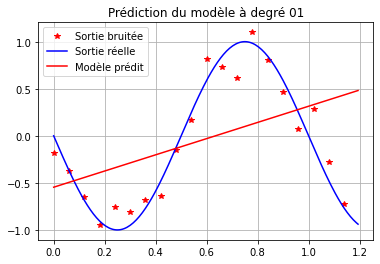

Degre =  2


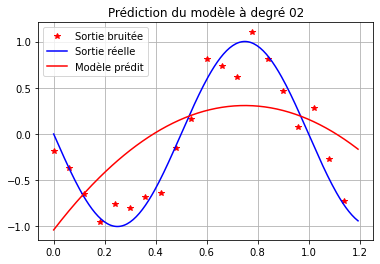

Degre =  3


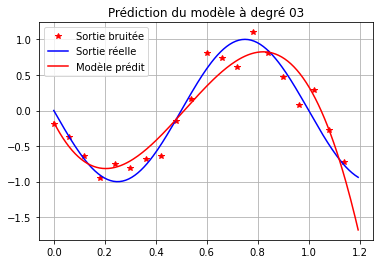

Degre =  4


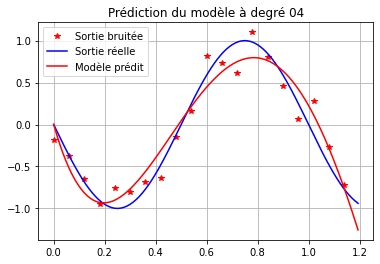

Degre =  5


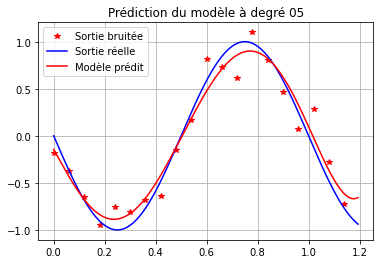

Degre =  6


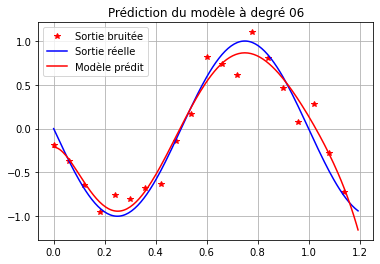

Degre =  7


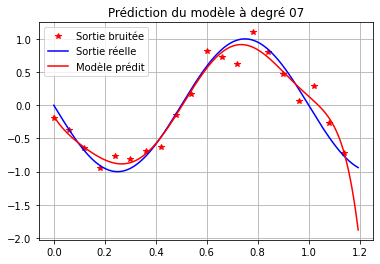

Degre =  8


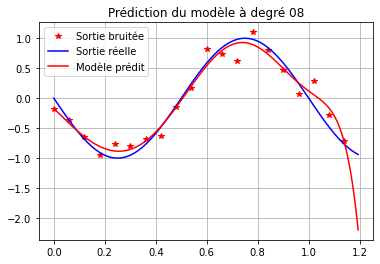

Degre =  9


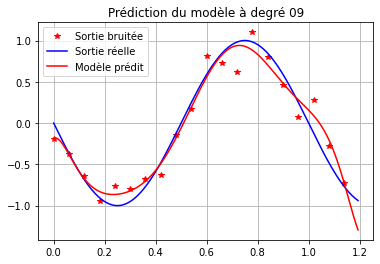

Degre =  10


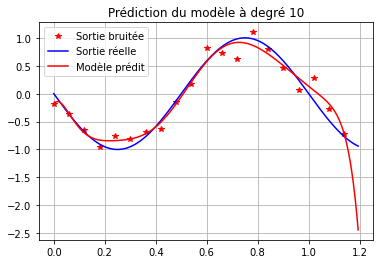

Degre =  11


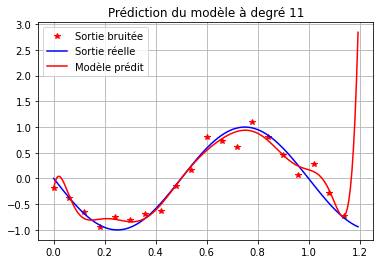

Degre =  12


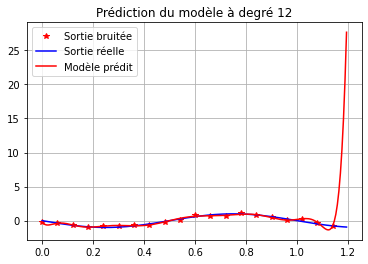

Meilleur modèle -> degre = 6


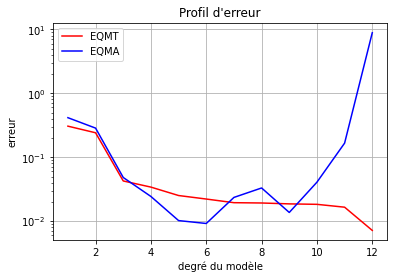

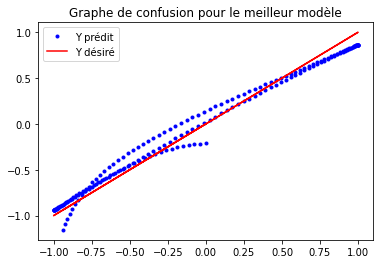

In [6]:
main(degreMax=12, NbEx=20, sigma=0.2)

On observe qu'à partir d'un certain moment (degré du modèle supérieur au degré sur la fenêtre observée) on observe que le modèle va venir faire la régression sur le bruit, c'est-à-dire que la précision devient trop grand pour approximer la fonction observée et le modèle va venir prendre en compte les petites variations dûes au bruit. On observe le degré optimal grâce à la courbe du profil d'erreur lorsque l'EQMA commence à remonter. On observe également l'effet du bruit et son écart à la fonction prédite grâce au graphique de confusion.

On peut observer l'impact du nombre d'exemple sur le profil d'erreur.

Degre =  1


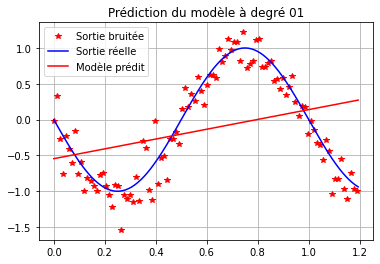

Degre =  2


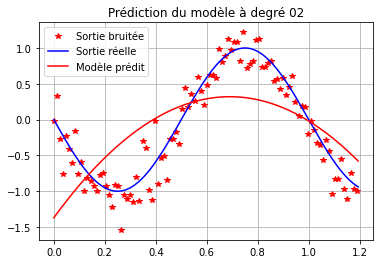

Degre =  3


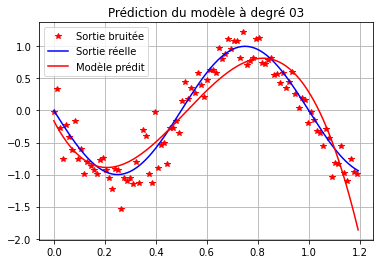

Degre =  4


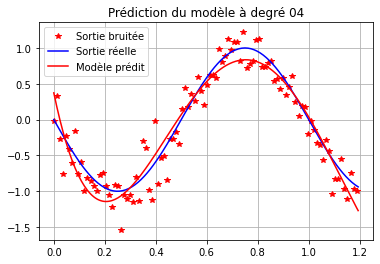

Degre =  5


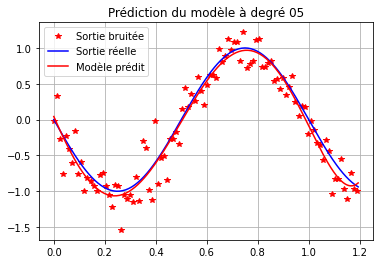

Degre =  6


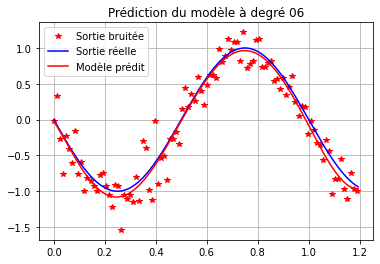

Degre =  7


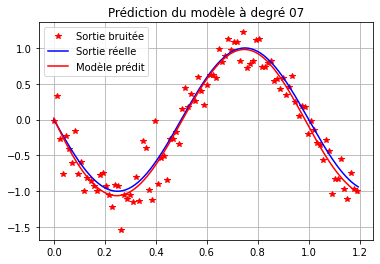

Degre =  8


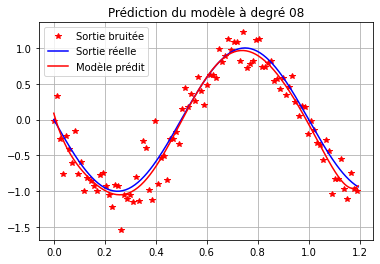

Degre =  9


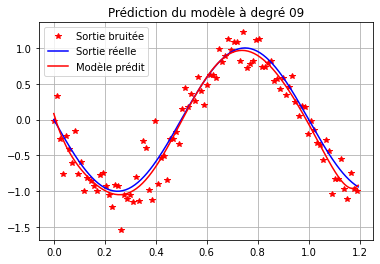

Degre =  10


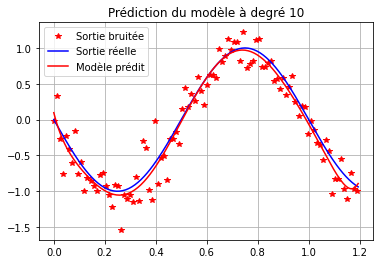

Degre =  11


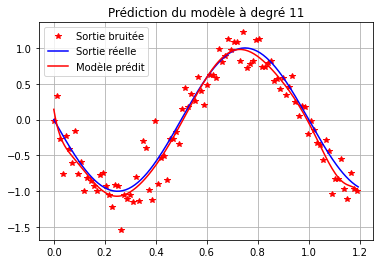

Degre =  12


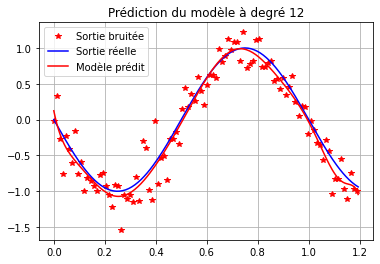

Meilleur modèle -> degre = 7


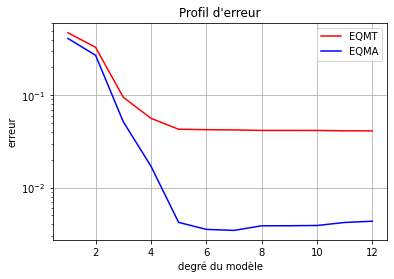

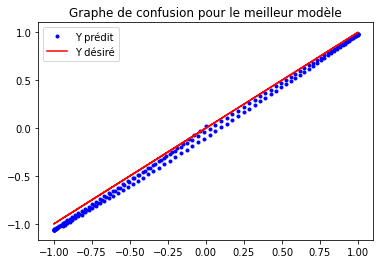

In [7]:
main(degreMax=12, NbEx=100, sigma=0.2)

On va pouvoir mieux approximer les observations, c'est-à-dire diminuer l'erreur pour le degré optimal mais on aura toujours le cas d'EQMA qui remonte.

L'évolution de l'écart-type va venir augmenter l'erreur globale sur le profil d'erreur en diminuant la précision des mesures.

Degre =  1


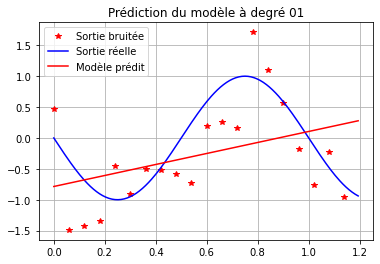

Degre =  2


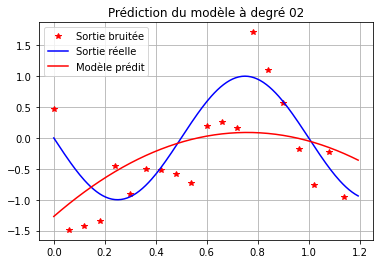

Degre =  3


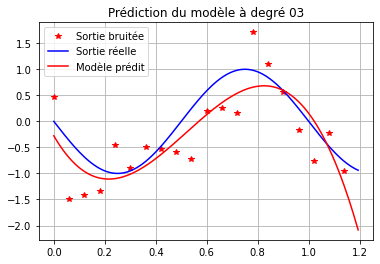

Degre =  4


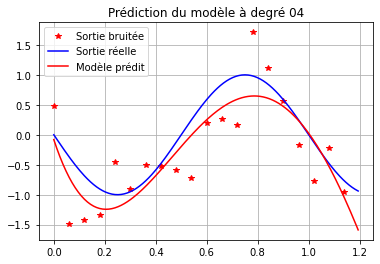

Degre =  5


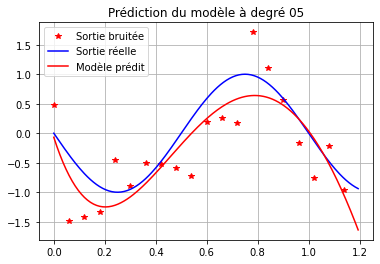

Degre =  6


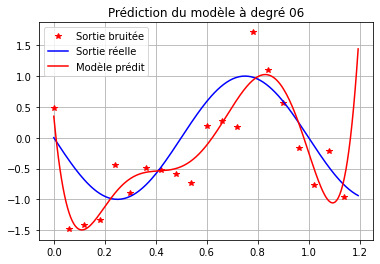

Degre =  7


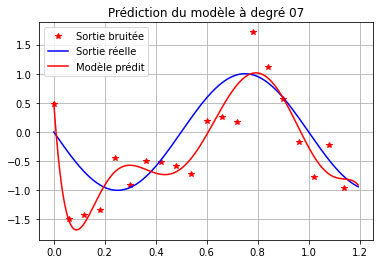

Degre =  8


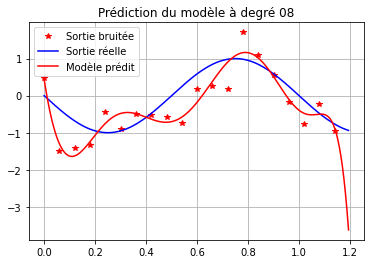

Degre =  9


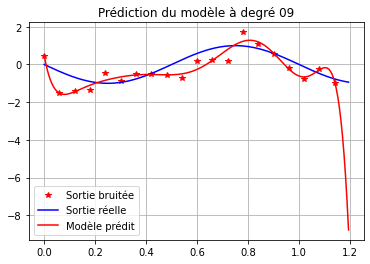

Degre =  10


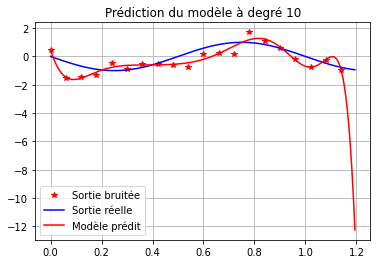

Degre =  11


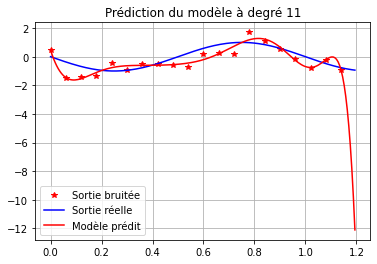

Degre =  12


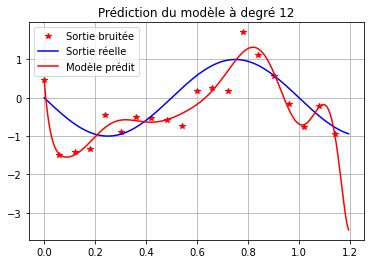

Meilleur modèle -> degre = 4


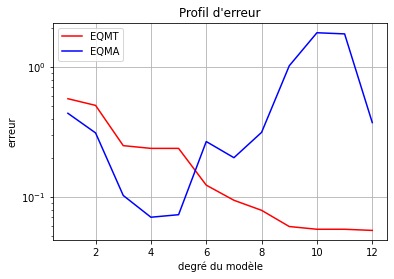

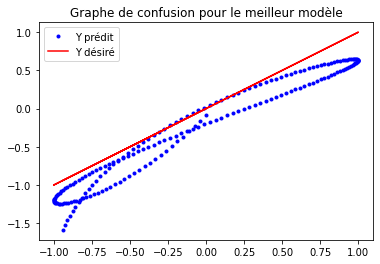

In [8]:
main(degreMax=12, NbEx=20, sigma=0.5)

Degre =  1


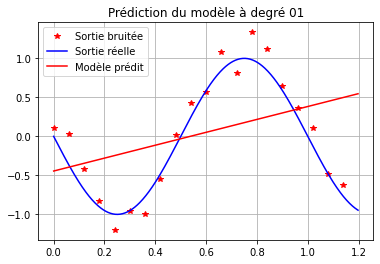

Degre =  2


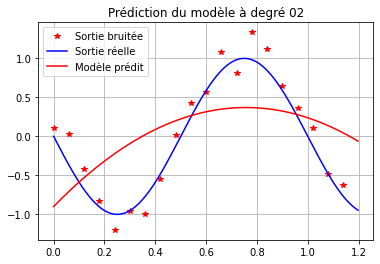

Degre =  3


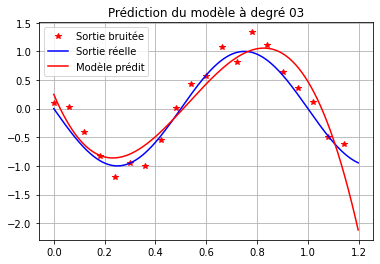

Degre =  4


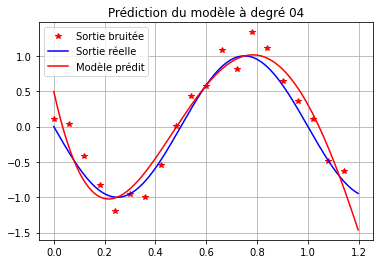

Degre =  5


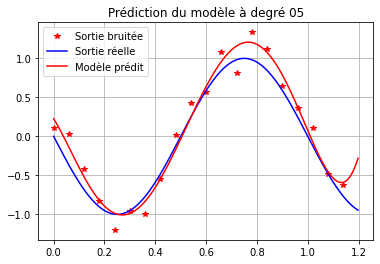

Degre =  6


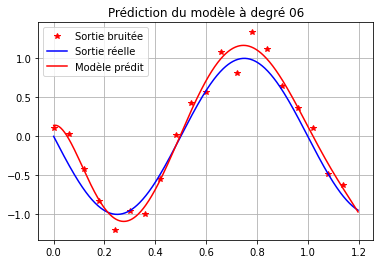

Degre =  7


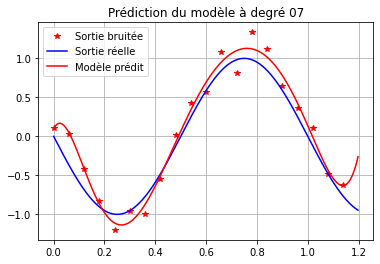

Degre =  8


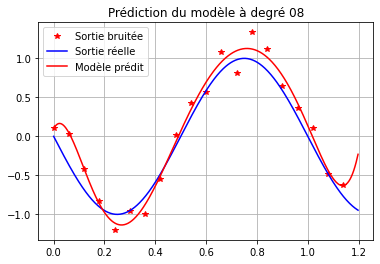

Degre =  9


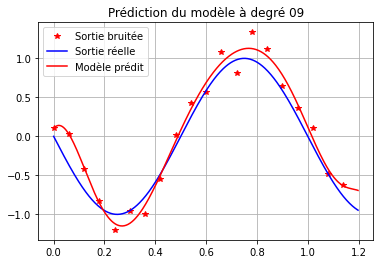

Degre =  10


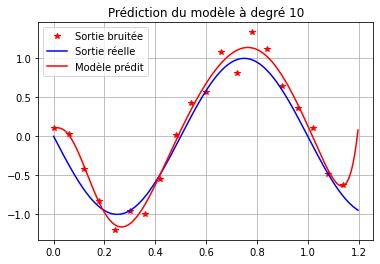

Degre =  11


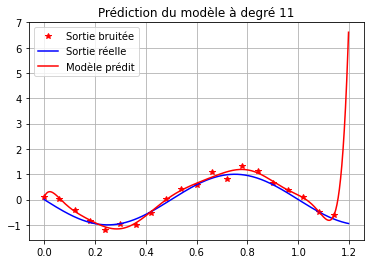

Degre =  12


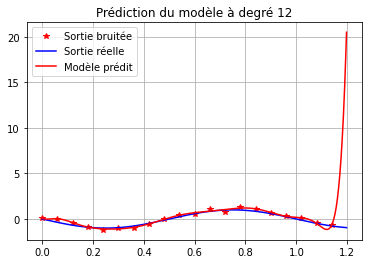

Meilleur modèle -> degre = 6


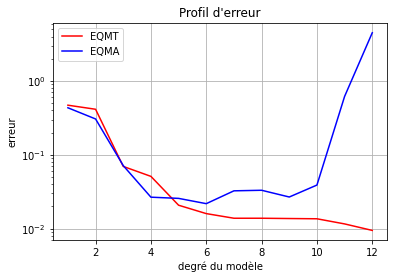

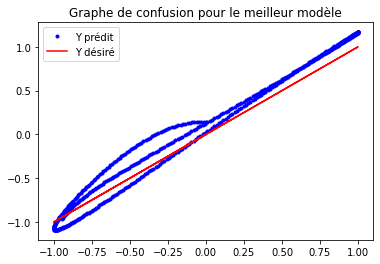

In [9]:
main(degreMax=12, NbEx=20, sigma=0.2, ens=500)

## 2. Modélisation par réseaux de neurones MLP

On souhaite à nouveau trouver un modèle de prédiction à partir des observations. Cette fois-ci, on n'utilise pas de solution unique mais plutôt une convergence de solution sur une moyenne de plusieurs initialisation du réseau pour chaque niveau de complexité. On aurra cette fois, un problème de surapprentissage qui sera observé lorsque l'on entraîne notre modèle.

In [10]:
from matplotlib import cm
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.ticker import LinearLocator, FormatStrFormatter
from sklearn.neural_network import MLPRegressor

In [22]:
def sinus_cardinal(x): 
    A = np.array([[1, 1], [-2, 1]])
    b = np.array([0.2, -0.3])

    x = -np.pi + 2*x*np.pi
    z = A.dot(x + b)
    h = np.sqrt(np.transpose(z).dot(z))
    if np.abs(h) < 0.001:
        y = 1
    else:
        y = np.sin(h)/h
    return y

In [50]:
def plot_surf(figName, regr=None):
    step_v = 0.005

    x1v = np.arange(0,1,step_v)
    x2v = np.arange(0,1,step_v)
    Xv, Yv = np.meshgrid(x1v, x2v)

    R = np.zeros(Xv.shape)
    for i,x1 in enumerate(x1v):
        for j,x2 in enumerate(x2v):
            if not regr:
                R[i,j] = sinus_cardinal(np.array([x1, x2]))
            else:
                R[i,j] = regr.predict(np.array([[x1,x2]]))[0]
    
    fig = plt.figure()
    ax = plt.axes(projection='3d')

    # Plot the surface
    surf = ax.plot_surface(Xv, Yv, R, cmap=cm.coolwarm, linewidth=0, antialiased=False)

    ax.set_zlim(-1.01, 1.01)
    ax.zaxis.set_major_locator(LinearLocator(10))
    ax.zaxis.set_major_formatter(FormatStrFormatter('%.02f'))

    fig.colorbar(surf, shrink=0.5, aspect=5)
    plt.savefig(figName+'.png', dpi=300)
    plt.show()
    plt.close()

In [46]:
def main(fileData):
    # Chargement des données d'entrainement
    with open(fileData, 'r') as f:
        f.readline()
        Xapp = np.loadtxt(f, delimiter = ";", skiprows=1)
    
    Yapp = []
    # print(sinus_cardinal(Xapp[0]))
    for x in Xapp:
        # print(x)
        Yapp.append(sinus_cardinal(x))


    regr = MLPRegressor(
            hidden_layer_sizes=(32,32,32),
            max_iter=1000,
            verbose=True,
            random_state=1,
            tol=1e-6
        ).fit(Xapp,Yapp)
    
    plot_surf("mlp_test")

    plot_surf("mlp_pred", regr=regr)

In [14]:
fileData = "sinc_dim2_input.csv"

Iteration 1, loss = 0.05740163
Iteration 2, loss = 0.05266336
Iteration 3, loss = 0.04870684
Iteration 4, loss = 0.04554897
Iteration 5, loss = 0.04298842
Iteration 6, loss = 0.04102289
Iteration 7, loss = 0.03967706
Iteration 8, loss = 0.03884706
Iteration 9, loss = 0.03842922
Iteration 10, loss = 0.03827398
Iteration 11, loss = 0.03823175
Iteration 12, loss = 0.03823855
Iteration 13, loss = 0.03821542
Iteration 14, loss = 0.03812472
Iteration 15, loss = 0.03796829
Iteration 16, loss = 0.03777099
Iteration 17, loss = 0.03753403
Iteration 18, loss = 0.03725668
Iteration 19, loss = 0.03698537
Iteration 20, loss = 0.03670326
Iteration 21, loss = 0.03646273
Iteration 22, loss = 0.03628747
Iteration 23, loss = 0.03616490
Iteration 24, loss = 0.03607125
Iteration 25, loss = 0.03598384
Iteration 26, loss = 0.03590608
Iteration 27, loss = 0.03583750
Iteration 28, loss = 0.03578035
Iteration 29, loss = 0.03572684
Iteration 30, loss = 0.03567354
Iteration 31, loss = 0.03560571
Iteration 32, los

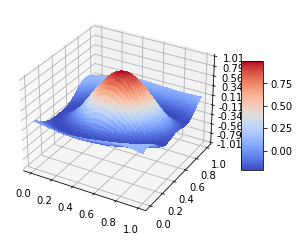

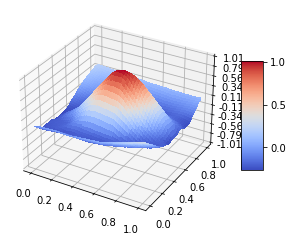

In [51]:
main(fileData=fileData)